In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df.head(5)

#print(df["Treatment Type"].unique())


,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


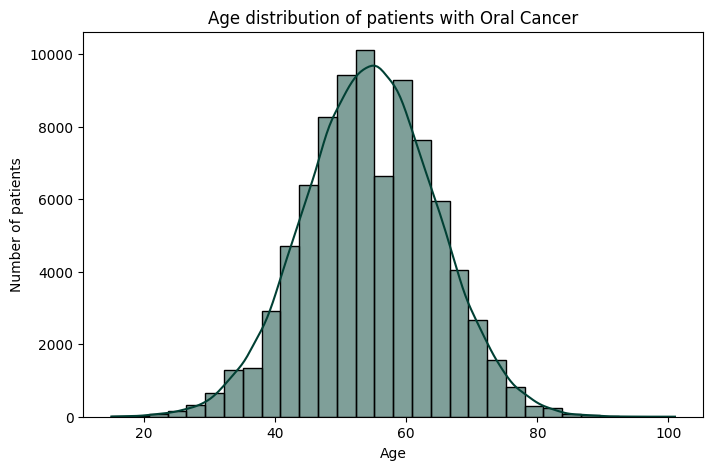

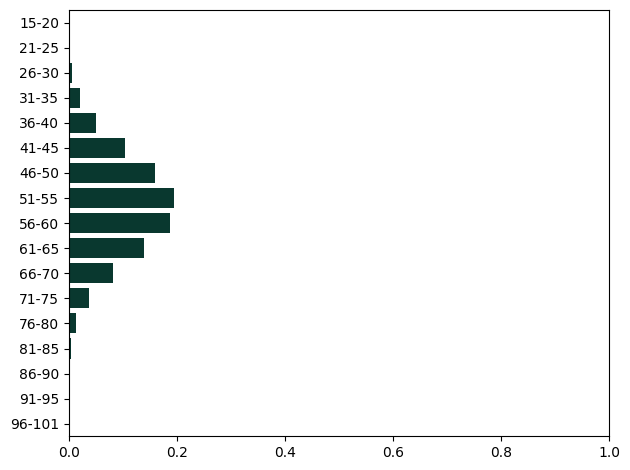

In [3]:
colors = (1/255,64/255,52/255)
df = pd.read_csv("../data/oral_cancer_dataset.csv")
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color=colors)
plt.title("Age distribution of patients with Oral Cancer")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()



max_age = df["Age"].max()
min_age = df["Age"].min() 




range_df = df["Age"].value_counts(bins=17, normalize=True).sort_index()
range_df.index = [f"{int(np.ceil(iv.left))}-{int(iv.right)}" for iv in range_df.index]
sns.set_color_codes("pastel")
sns.barplot(x= range_df.values, y= [str(x) for x in range_df.index], orient='h', color=colors)
plt.xlabel('')  
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()



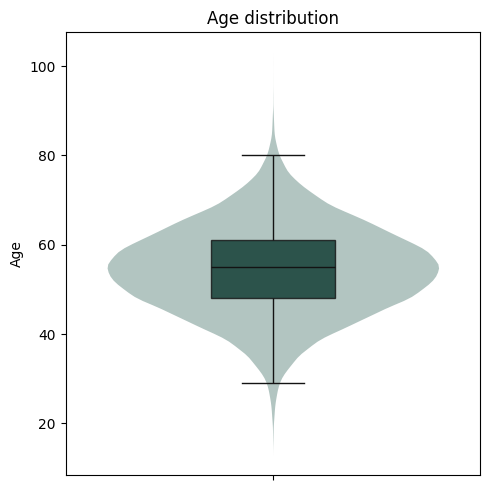

In [5]:
col = "Age"
color = '#014034'

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

vp = sns.violinplot(data=df[col], color=color,
                    inner=None, linewidth=0, saturation=1, ax=ax)

for patch in vp.collections:
    patch.set_alpha(0.3)  

bp = sns.boxplot(data=df[col], color=color, width=0.3,
                    boxprops={'zorder': 2}, saturation=0.7, ax=ax,showfliers=False)

for patch in bp.patches:
    patch.set_alpha(0.8)

ax.set_ylabel('')   

plt.title('Age distribution')
plt.ylabel('Age')
plt.tight_layout()
#plt.savefig(f"../outputs/brain_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


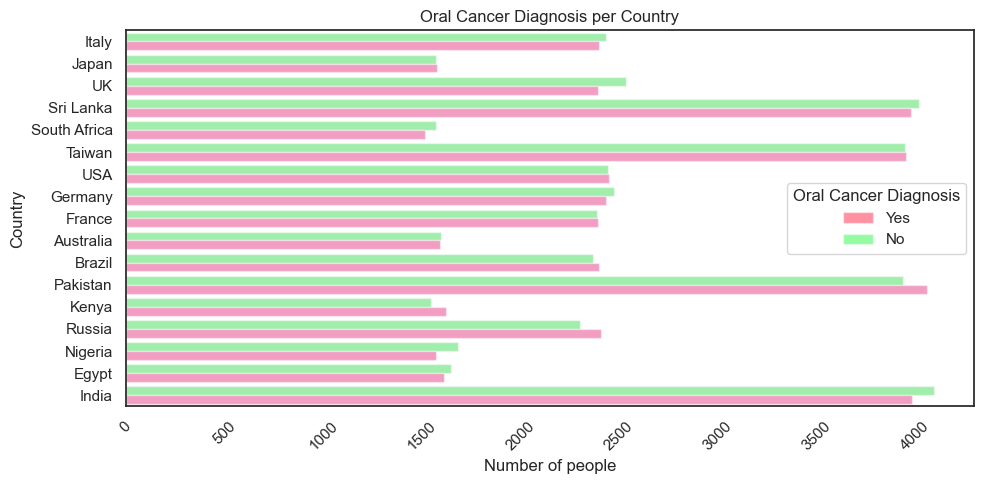

In [14]:

df = pd.read_csv("../data/oral_cancer_dataset.csv")
plt.figure(figsize=(10,5))

# Definisci la palette: verde per No, rosso per Yes
palette = {
    "No": (7/255, 247/255, 43/255),
    "Yes": (255/255, 0/255, 111/255)
}

ax = sns.countplot(
    data=df,
    y="Country",
    hue="Oral Cancer (Diagnosis)",
    palette=palette
)


# Imposto alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

handles = [
    Patch(facecolor="#ff002b", alpha=0.43, label="Yes"),
    Patch(facecolor="#07f72b", alpha=0.43, label="No")
]
ax.legend(handles=handles, title="Oral Cancer Diagnosis")

plt.title("Oral Cancer Diagnosis per Country")
plt.xticks(rotation=45)
plt.xlabel("Number of people")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


/var/folders/6_/rzvng5pn14z9kc8qw_hjns_40000gn/T/ipykernel_25934/3347162452.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


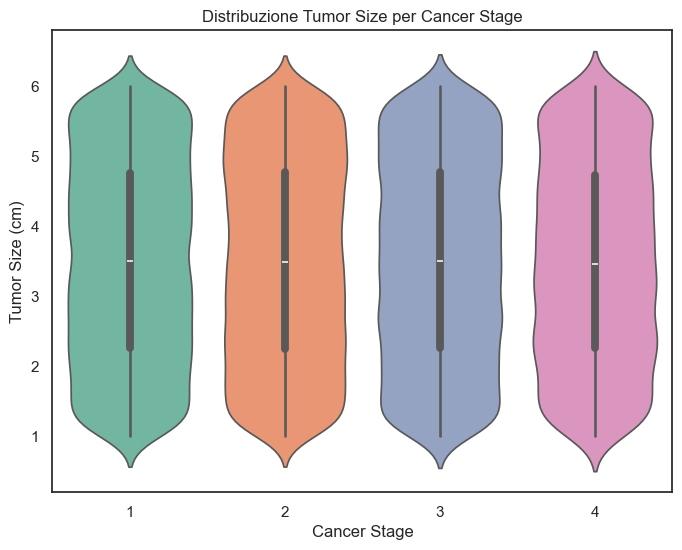

In [15]:
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df= df[df["Cancer Stage"] != 0]



plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x="Cancer Stage",
    y="Tumor Size (cm)",
    palette="Set2",
    inner="box"   # opzionale: mostra il boxplot interno
)
plt.title("Distribuzione Tumor Size per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (cm)")
plt.show()


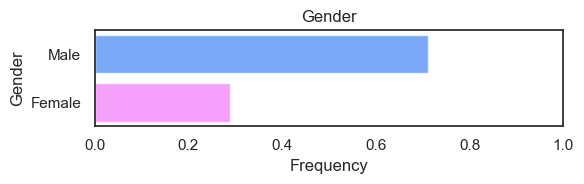

In [17]:
df = pd.read_csv("../data/oral_cancer_dataset.csv")

col = "Gender"
serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)

# Palette pastel
colors = [(66/255, 135/255, 245/255), (242/255, 121/255, 252/255)]

fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# Se ci sono più barre che colori, ripeti la lista dei colori
bar_colors = [colors[i % len(colors)] for i in range(len(labels))]

bars = ax.barh(y_pos, values, color=bar_colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # ordine simile a seaborn
ax.set_xlabel("Frequency")
ax.set_ylabel("Gender")
ax.set_xlim(0, 1.0)
ax.set_title(col)
plt.tight_layout()
plt.show()



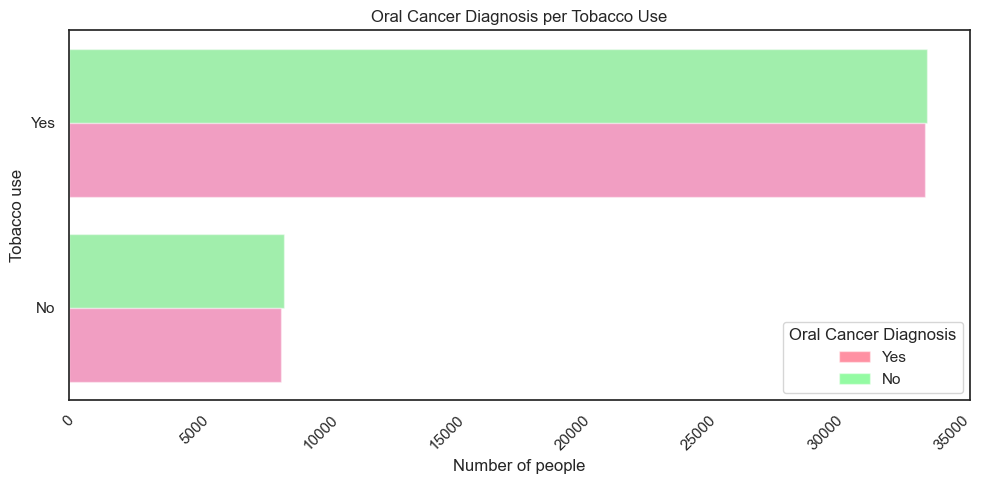

In [18]:
df = pd.read_csv("../data/oral_cancer_dataset.csv")
plt.figure(figsize=(10,5))

# Definisci la palette: verde per No, rosso per Yes
palette = {
    "No": (7/255, 247/255, 43/255),
    "Yes": (255/255, 0/255, 111/255)
}

ax = sns.countplot(
    data=df,
    y="Tobacco Use",
    hue="Oral Cancer (Diagnosis)",
    palette=palette
)


# Imposto alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

handles = [
    Patch(facecolor="#ff002b", alpha=0.43, label="Yes"),
    Patch(facecolor="#07f72b", alpha=0.43, label="No")
]
ax.legend(handles=handles, title="Oral Cancer Diagnosis")

plt.title("Oral Cancer Diagnosis per Tobacco Use")
plt.xticks(rotation=45)
plt.xlabel("Number of people")
plt.ylabel("Tobacco use")
plt.tight_layout()
plt.show()






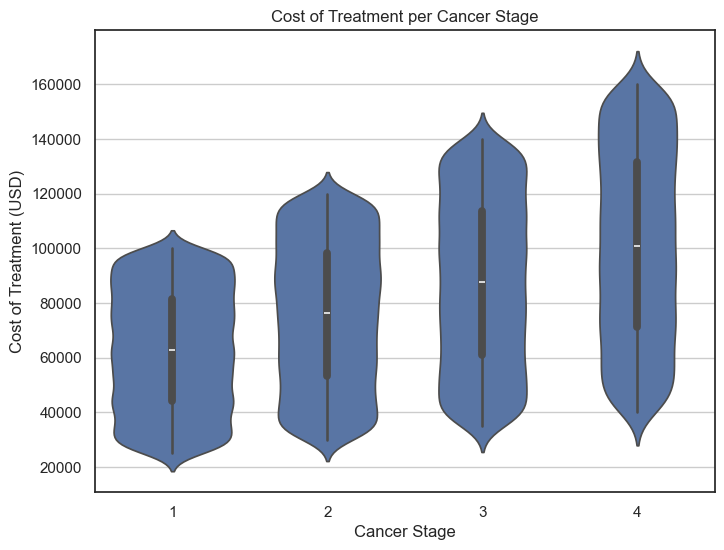

In [19]:
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df = df[df["Cancer Stage"] != 0]



plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x="Cancer Stage",
    y="Cost of Treatment (USD)",
    inner="box"   # opzionale: mostra un boxplot all'interno del violino
)
plt.title("Cost of Treatment per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Cost of Treatment (USD)")
plt.grid(True, axis="y")
plt.show()



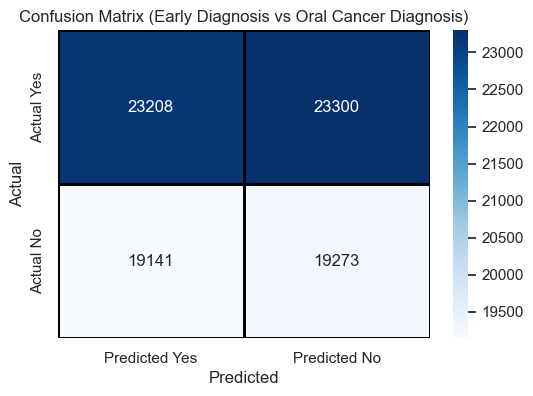

In [20]:
# Normalizzo i valori (nel caso ci siano spazi, maiuscole ecc.)
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df["Early Diagnosis"] = df["Early Diagnosis"].str.strip().str.capitalize()
df["Oral Cancer (Diagnosis)"] = df["Oral Cancer (Diagnosis)"].str.strip().str.capitalize()

# Calcolo manuale dei valori
TP = ((df["Early Diagnosis"] == "Yes") & (df["Oral Cancer (Diagnosis)"] == "Yes")).sum()
FP = ((df["Early Diagnosis"] == "Yes") & (df["Oral Cancer (Diagnosis)"] == "No")).sum()
TN = ((df["Early Diagnosis"] == "No") & (df["Oral Cancer (Diagnosis)"] == "No")).sum()
FN = ((df["Early Diagnosis"] == "No") & (df["Oral Cancer (Diagnosis)"] == "Yes")).sum()

# Creo la matrix in formato pandas
cm = pd.DataFrame(
    [[TP, FP],
     [FN, TN]],
    index=["Actual Yes", "Actual No"],
    columns=["Predicted Yes", "Predicted No"]
)

# Plot stile confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=2, linecolor='black')
plt.title("Confusion Matrix (Early Diagnosis vs Oral Cancer Diagnosis)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()




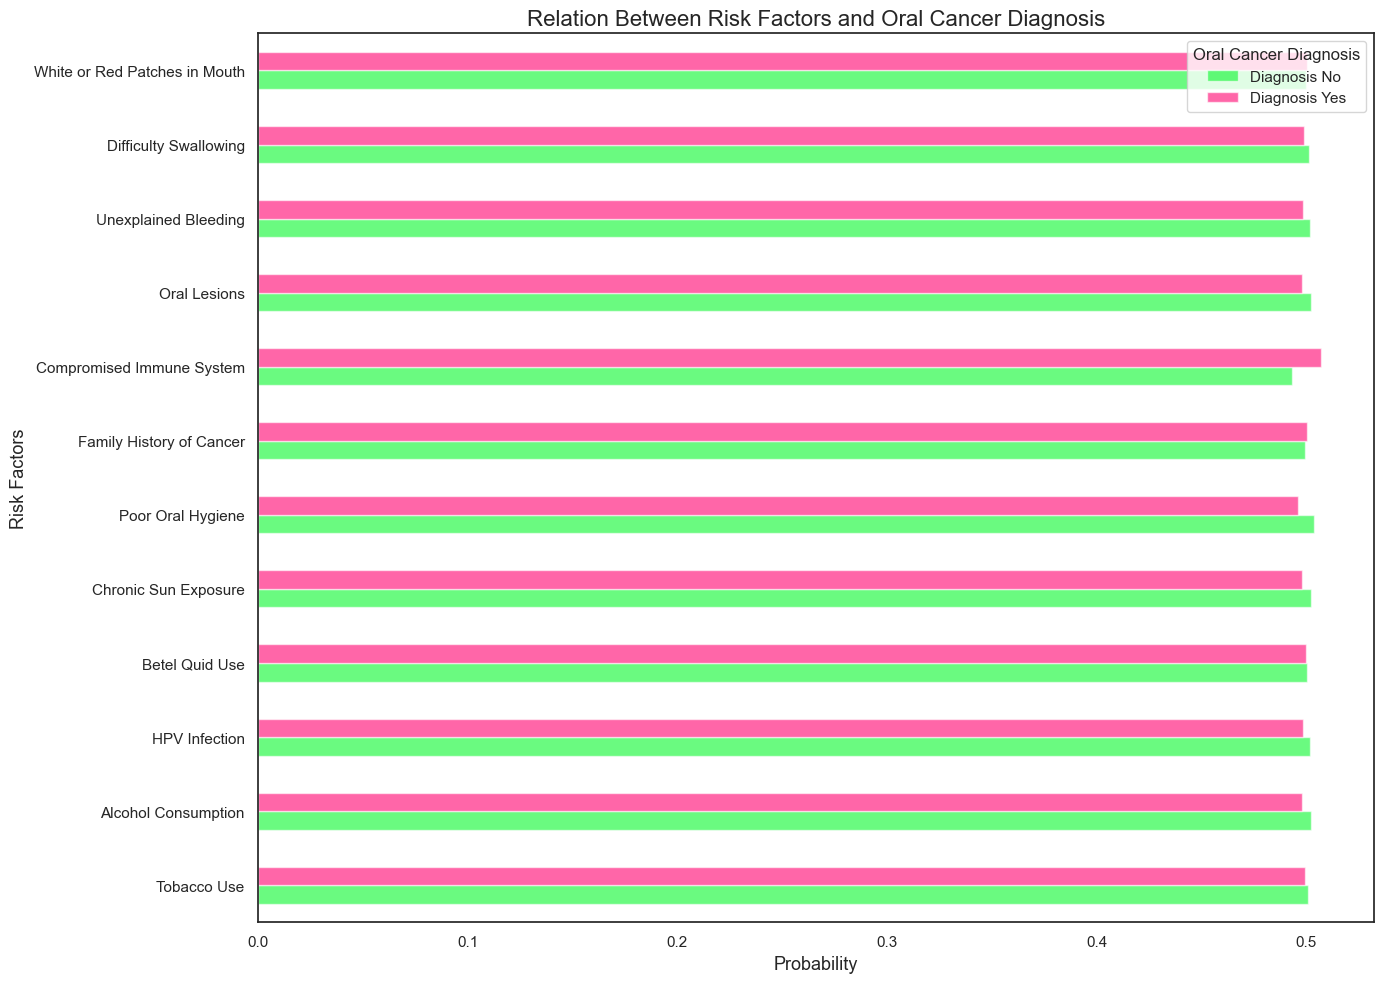

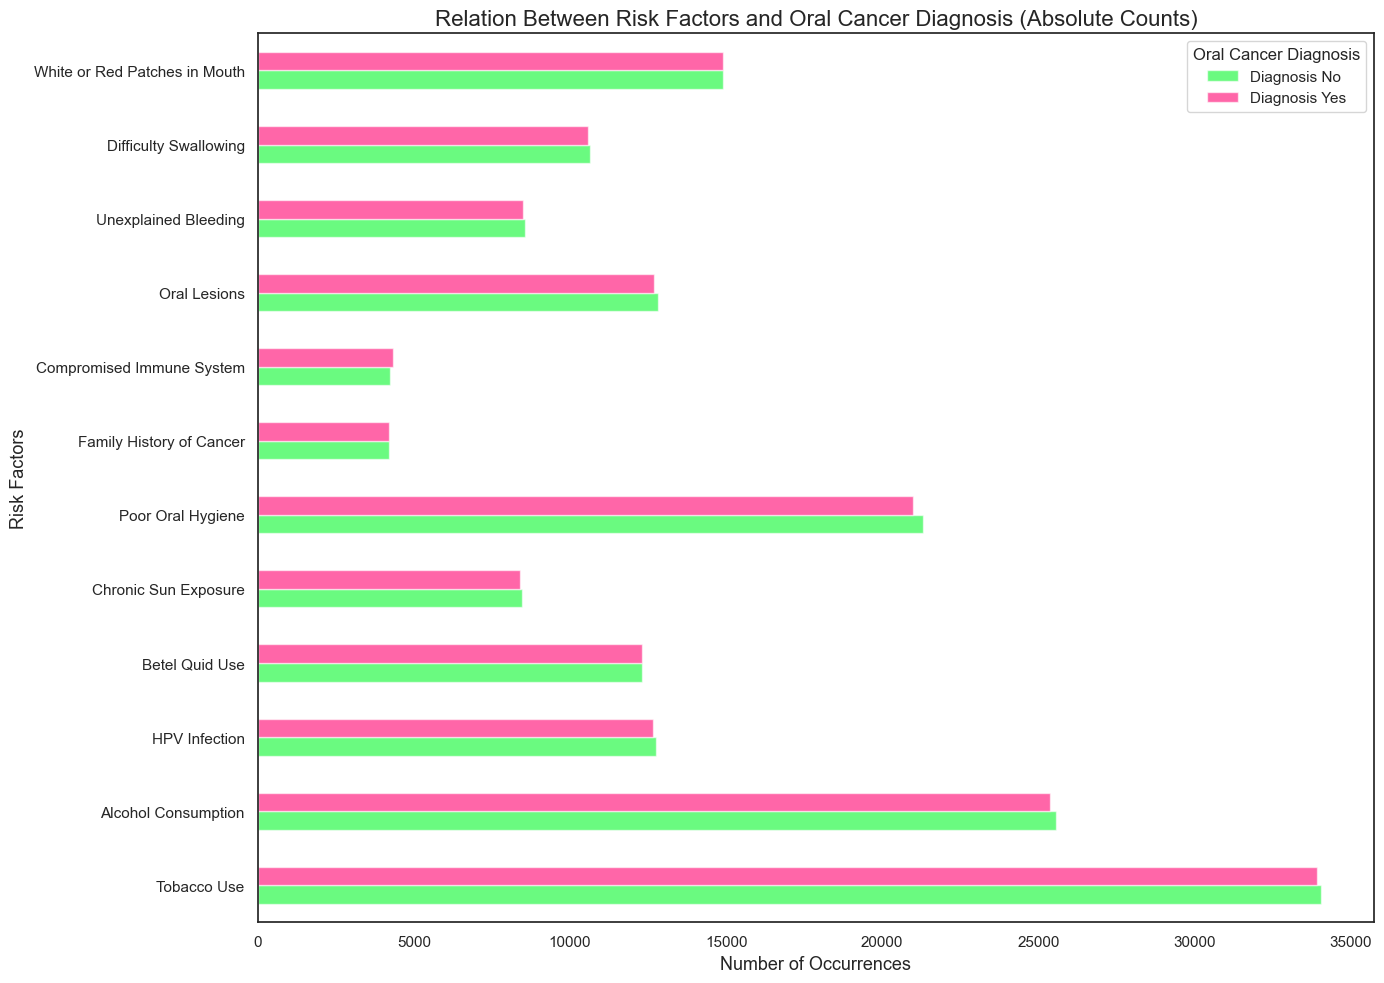

In [23]:

# Leggi il dataset
df = pd.read_csv("../data/oral_cancer_dataset.csv")

cols = [
    "Tobacco Use", "Alcohol Consumption", "HPV Infection", "Betel Quid Use",
    "Chronic Sun Exposure", "Poor Oral Hygiene",
    "Family History of Cancer", "Compromised Immune System", "Oral Lesions",
    "Unexplained Bleeding", "Difficulty Swallowing", "White or Red Patches in Mouth"
]

# Normalizza valori Yes/No
for c in cols + ["Oral Cancer (Diagnosis)"]:
    df[c] = df[c].astype(str).str.strip().str.capitalize()

# Calcolo frequenze relative per ogni feature
summary = {}
for c in cols:
    temp = df.groupby("Oral Cancer (Diagnosis)")[c].value_counts().unstack().fillna(0)
    if "Yes" in temp.columns:
        counts = temp.loc[:, "Yes"]
    elif "Present" in temp.columns:
        counts = temp.loc[:, "Present"]
    else:
        counts = temp.iloc[:, 0]
    # Frequenze relative rispetto al totale della feature
    freqs = counts / counts.sum()
    summary[c] = freqs

# Converti in DataFrame
summary_df = pd.DataFrame(summary).T
summary_df.columns = ["Diagnosis No", "Diagnosis Yes"]

# Colori RGB normalizzati (0-1)
colors = [(7/255, 247/255, 43/255), (255/255, 0/255, 111/255)]  # Verde, Rosso

# Plot
ax = summary_df.plot(
    kind="barh",
    figsize=(14, 10),
    color=colors
)
ax.grid(False)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.6)

plt.title("Relation Between Risk Factors and Oral Cancer Diagnosis", fontsize=16)
plt.ylabel("Risk Factors", fontsize=13)
plt.xlabel("Probability", fontsize=13)
plt.legend(title="Oral Cancer Diagnosis")
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Leggi il dataset
df = pd.read_csv("../data/oral_cancer_dataset.csv")

cols = [
    "Tobacco Use", "Alcohol Consumption", "HPV Infection", "Betel Quid Use",
    "Chronic Sun Exposure", "Poor Oral Hygiene",
    "Family History of Cancer", "Compromised Immune System", "Oral Lesions",
    "Unexplained Bleeding", "Difficulty Swallowing", "White or Red Patches in Mouth"
]

# Normalizza Yes/No
for c in cols + ["Oral Cancer (Diagnosis)"]:
    df[c] = df[c].astype(str).str.strip().str.capitalize()

# Calcolo conteggi assoluti di "Yes" per ciascuna feature e stato
summary_counts = {}
for c in cols:
    temp = df.groupby("Oral Cancer (Diagnosis)")[c].value_counts().unstack().fillna(0)
    if "Yes" in temp.columns:
        summary_counts[c] = temp.loc[:, "Yes"]
    elif "Present" in temp.columns:
        summary_counts[c] = temp.loc[:, "Present"]
    else:
        summary_counts[c] = temp.iloc[:, 0]

# Converti in DataFrame
summary_df = pd.DataFrame(summary_counts).T
summary_df.columns = ["Diagnosis No", "Diagnosis Yes"]

# Colori RGB normalizzati (0-1)
colors = [(7/255, 247/255, 43/255), (255/255, 0/255, 111/255)]  # Verde, Rosso

# Plot
ax = summary_df.plot(
    kind="barh",
    figsize=(14, 10),
    color=colors
)
ax.grid(False)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.6)

plt.title("Relation Between Risk Factors and Oral Cancer Diagnosis (Absolute Counts)", fontsize=16)
plt.ylabel("Risk Factors", fontsize=13)
plt.xlabel("Number of Occurrences", fontsize=13)
plt.legend(title="Oral Cancer Diagnosis")
plt.tight_layout()
plt.show()






/var/folders/6_/rzvng5pn14z9kc8qw_hjns_40000gn/T/ipykernel_25934/413833926.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


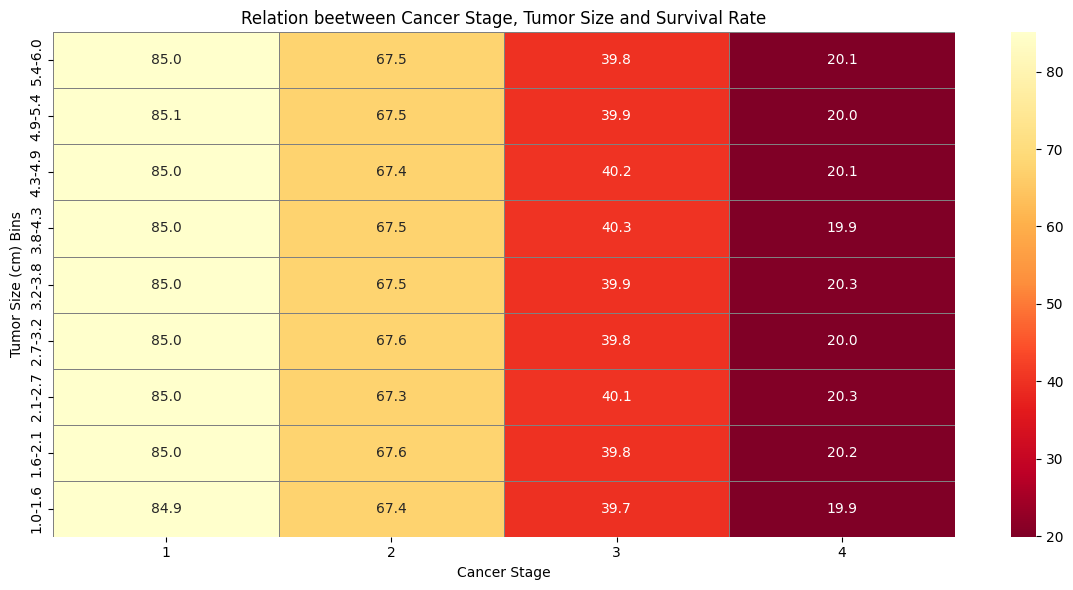

In [11]:
# Filtra righe con Cancer Stage > 0
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df = df[df['Cancer Stage'] > 0].copy()

# Creiamo dei bins per Tumor Size
bins = np.linspace(df['Tumor Size (cm)'].min(), df['Tumor Size (cm)'].max(), 10)
labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]
df['Tumor Size Bin'] = pd.cut(df['Tumor Size (cm)'], bins=bins, labels=labels, include_lowest=True)

# Pivot table con media della sopravvivenza
heatmap_data = df.pivot_table(
    index='Tumor Size Bin',
    columns='Cancer Stage',
    values='Survival Rate (5-Year, %)',
    aggfunc='mean'
)

# Invertiamo l'ordine delle righe: dimensioni piccole in basso
heatmap_data = heatmap_data.iloc[::-1]

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd_r",  # palette invertita: colori scuri = sopravvivenza bassa
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Relation beetween Cancer Stage, Tumor Size and Survival Rate")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (cm) Bins")
plt.tight_layout()
plt.show()




/var/folders/6_/rzvng5pn14z9kc8qw_hjns_40000gn/T/ipykernel_25934/1703548048.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(agg_data["Treatment Type"], rotation=45, ha="right")


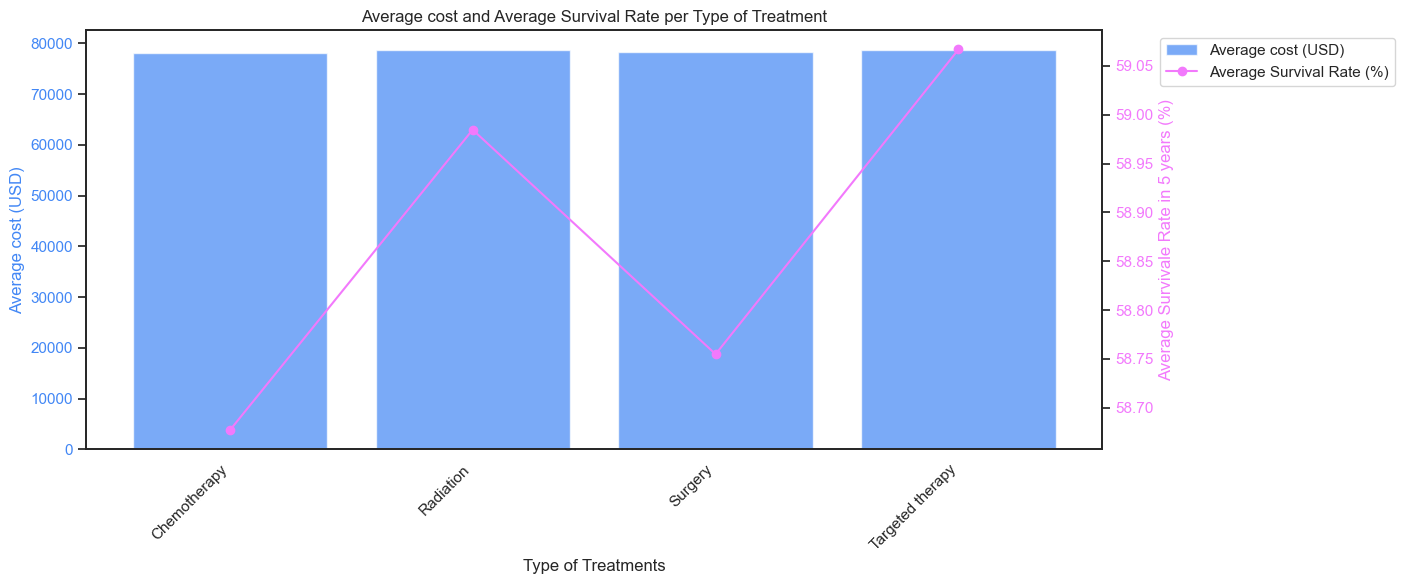

In [12]:
df = pd.read_csv("../data/oral_cancer_dataset.csv")
# Normalizza i valori della colonna Treatment Type
df["Treatment Type"] = df["Treatment Type"].astype(str).str.strip().str.capitalize()

# Filtra i dati: Cancer Stage > 0 e Treatment Type diverso da "No treatment"
df_filtered = df[
    (df["Treatment Type"] != "No treatment")
].copy()

#print(df_filtered.head(5))

# Controlla la statistica dei costi per ogni trattamento
#print(df_filtered.groupby("Treatment Type")["Cost of Treatment (USD)"].describe())

# Aggrega dati per Treatment Type
agg_data = df_filtered.groupby("Treatment Type").agg({
    "Cost of Treatment (USD)": "mean",
    "Survival Rate (5-Year, %)": "mean"
}).reset_index()

sns.set(style="white")  # stile pulito senza griglia

# Crea figura e assi
fig, ax1 = plt.subplots(figsize=(12,6))

# Barre per il costo medio
color_cost = (66/255, 135/255, 245/255)  # blu
bars = ax1.bar(agg_data["Treatment Type"], agg_data["Cost of Treatment (USD)"], 
               color=color_cost, alpha=0.7, label="Average cost (USD)")
ax1.set_xlabel("Type of Treatments")
ax1.set_ylabel("Average cost (USD)", color=color_cost)
ax1.tick_params(axis='y', labelcolor=color_cost)
ax1.set_xticklabels(agg_data["Treatment Type"], rotation=45, ha="right")
ax1.grid(False)

# Secondo asse Y per la sopravvivenza media
ax2 = ax1.twinx()
color_surv = (242/255, 121/255, 252/255)  # rosa
line = ax2.plot(agg_data["Treatment Type"], agg_data["Survival Rate (5-Year, %)"], 
                color=color_surv, marker='o', label="Average Survival Rate (%)")
ax2.set_ylabel("Average Survivale Rate in 5 years (%)", color=color_surv)
ax2.tick_params(axis='y', labelcolor=color_surv)
ax2.grid(False)

# Titolo e layout
plt.title("Average cost and Average Survival Rate per Type of Treatment")
fig.tight_layout()

# Legenda combinata
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


